In [2]:
import pandas as pd

In [16]:
taxis = pd.read_csv(r'D:\Documents\GO.IT\taxis.csv')
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [17]:
taxis.describe()

,passengers,distance,fare,tip,tolls,total
count,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
std,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570
min,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000


<Axes: xlabel='distance', ylabel='total'>

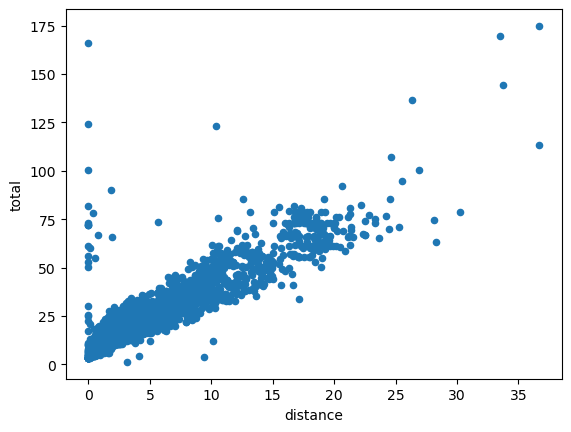

In [18]:
taxis.plot(x='distance', y='total', kind='scatter')

In [19]:
quantile_95 = taxis['total'].quantile(.95)

In [20]:
taxis = taxis[taxis['total'] <= quantile_95]

<Axes: xlabel='distance', ylabel='total'>

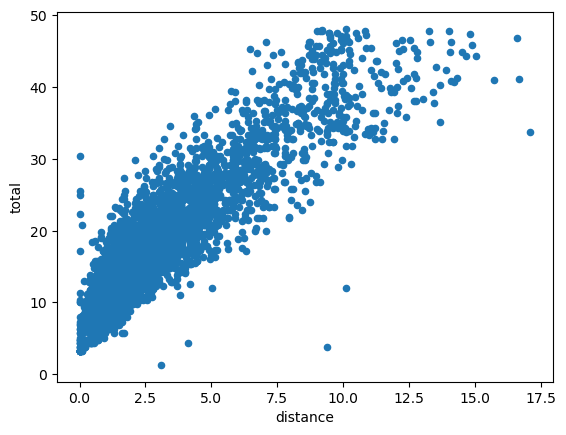

In [21]:
taxis.plot(x='distance', y='total', kind='scatter')

In [27]:
taxis = taxis.copy()
taxis.loc[:, 'pickup'] = pd.to_datetime(taxis['pickup'])
taxis.loc[:, 'dropoff'] = pd.to_datetime(taxis['dropoff'])

In [28]:
taxis.insert(column='date', loc=0, value=taxis['pickup'].dt.date)

In [29]:
taxis.head()

,date,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.6,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.0,0.0,9.3,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.7,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.1,0.0,13.4,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [30]:
import matplotlib.pyplot as plt

In [31]:
daily_rides = taxis.groupby('date', as_index=False)['pickup'].count()

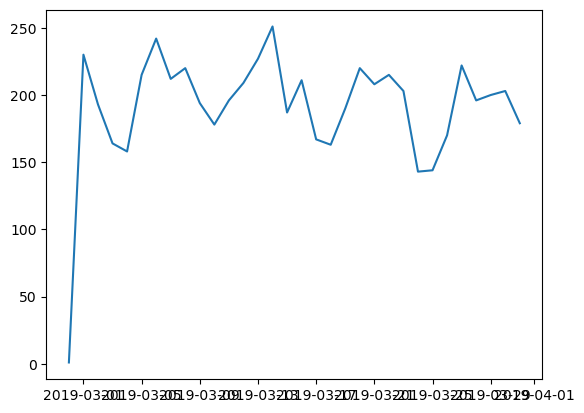

In [32]:
plt.plot('date', 'pickup', data=daily_rides)
plt.show()

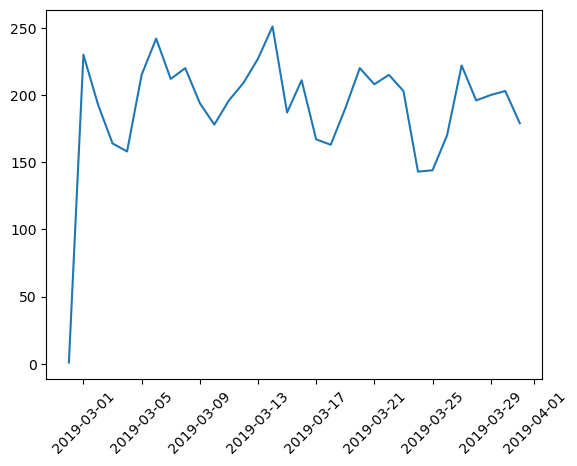

In [34]:
daily_rides = taxis.groupby('date', as_index=False)['pickup'].count()
plt.plot('date', 'pickup', data=daily_rides)
plt.xticks(rotation=45)
plt.show()

In [35]:
daily_value = taxis.groupby('date', as_index=False)[['fare', 'tip', 'tolls']].sum()

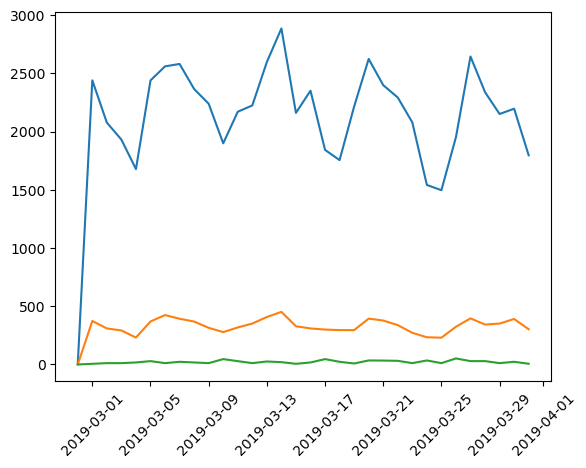

In [36]:
plt.plot(daily_value['date'], daily_value[['fare', 'tip', 'tolls']])
plt.xticks(rotation=45)
plt.show()

In [37]:
daily_value = taxis.groupby('date', as_index=False)[['fare', 'tip', 'tolls']].sum()

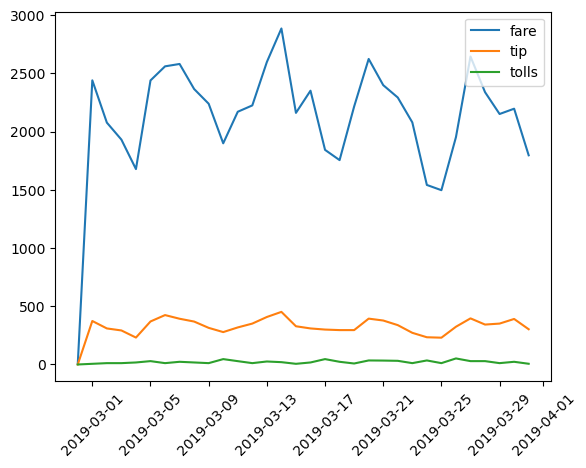

In [38]:
plt.plot(daily_value['date'], daily_value[['fare', 'tip', 'tolls']])
plt.xticks(rotation=45)
plt.legend(['fare', 'tip', 'tolls'], loc='upper right')
plt.show()

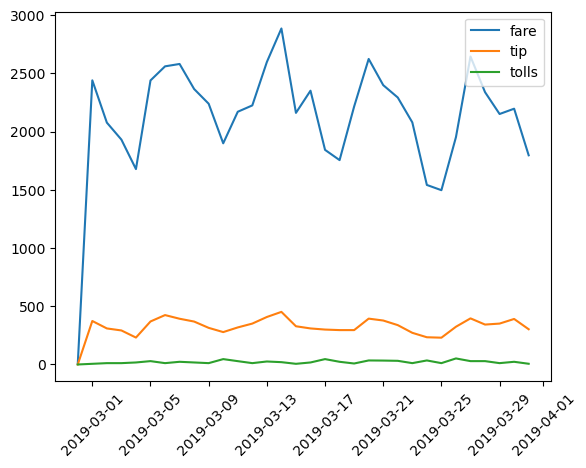

In [40]:
daily_value = taxis.groupby('date', as_index=False)[['fare', 'tip', 'tolls']].sum()
plt.plot(daily_value['date'], daily_value['fare'],
         daily_value['date'], daily_value['tip'],
         daily_value['date'], daily_value['tolls'])
plt.xticks(rotation=45)
plt.legend(['fare', 'tip', 'tolls'], loc='upper right')

plt.show()

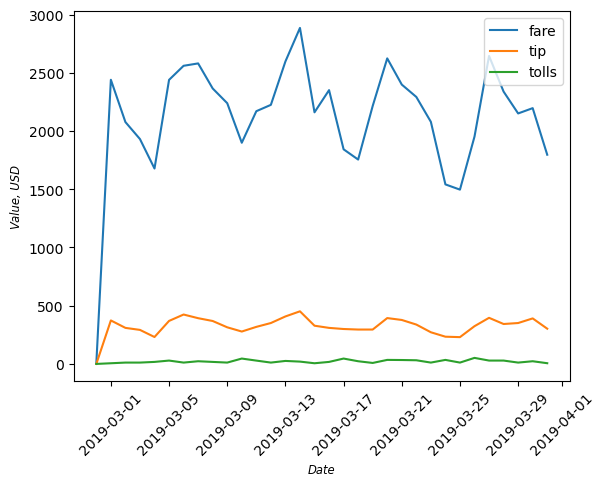

In [42]:
plt.plot(daily_value['date'], daily_value[['fare', 'tip', 'tolls']])
plt.xticks(rotation=45)
plt.xlabel('Date', fontsize='small', fontstyle='italic')
plt.ylabel('Value, USD', fontsize='small', fontstyle='italic')
plt.legend(['fare', 'tip', 'tolls'], loc='upper right')

plt.show()

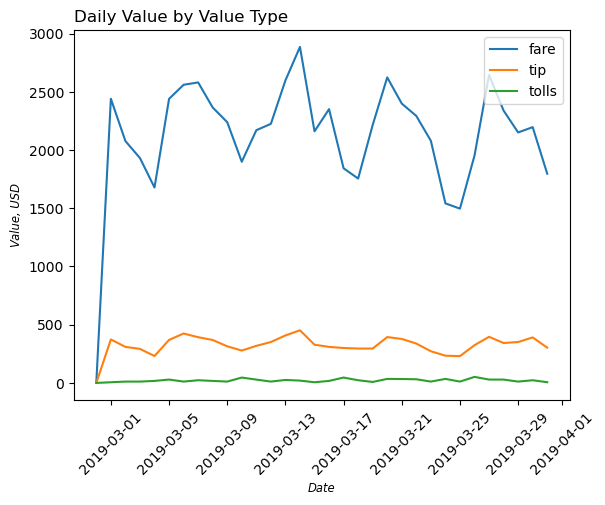

In [43]:
plt.plot(daily_value['date'], daily_value[['fare', 'tip', 'tolls']])
plt.xticks(rotation=45)
plt.xlabel('Date', fontsize='small', fontstyle='italic')
plt.ylabel('Value, USD', fontsize='small', fontstyle='italic')
plt.legend(['fare', 'tip', 'tolls'], loc='upper right')
plt.title('Daily Value by Value Type', fontsize='large', loc='left')
plt.show()

In [44]:
daily_rides.sort_values('date').head()

,date,pickup
0,2019-02-28,1
1,2019-03-01,230
2,2019-03-02,193
3,2019-03-03,164
4,2019-03-04,158


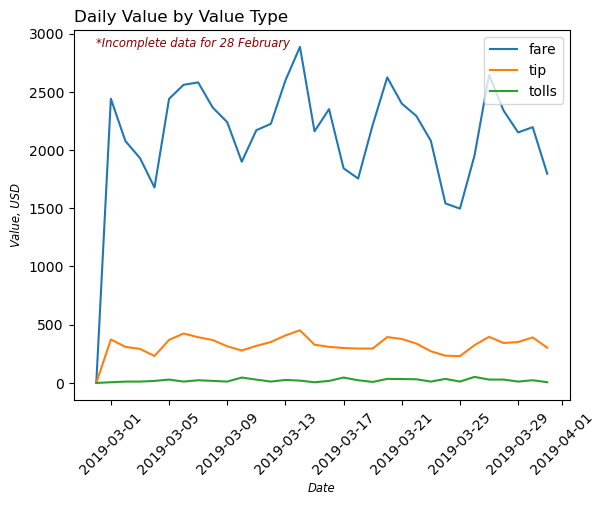

In [45]:
plt.plot(daily_value['date'], daily_value[['fare', 'tip', 'tolls']])
plt.xticks(rotation=45)
plt.xlabel('Date', fontsize='small', fontstyle='italic')
plt.ylabel('Value, USD', fontsize='small', fontstyle='italic')
plt.legend(['fare', 'tip', 'tolls'], loc='upper right')
plt.title('Daily Value by Value Type', fontsize='large', loc='left')
plt.text(daily_value['date'].min(),
         daily_value['fare'].max(), 
         '*Incomplete data for 28 February', 
         color='#8B0000', 
         fontstyle='italic',
         fontsize='small')

plt.show()

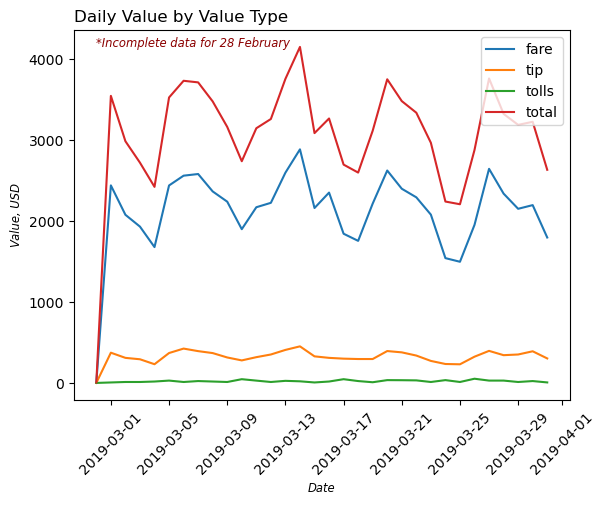

In [46]:
daily_value = taxis.groupby('date', as_index=False)[['fare', 'tip', 'tolls', 'total']].sum()

plt.plot(daily_value['date'], daily_value[['fare', 'tip', 'tolls']])

plt.plot(daily_value['date'], daily_value['total'])

plt.xticks(rotation=45)

plt.title('Daily Value by Value Type', fontsize='large', loc='left')
plt.xlabel('Date', fontsize='small', fontstyle='italic')
plt.ylabel('Value, USD', fontsize='small', fontstyle='italic')
plt.text(daily_value['date'].min(),
         daily_value['total'].max(),
         '*Incomplete data for 28 February', 
         color='#8B0000', 
         fontstyle='italic',
         fontsize='small')

plt.legend(['fare', 'tip', 'tolls', 'total'], loc='upper right')

plt.show()

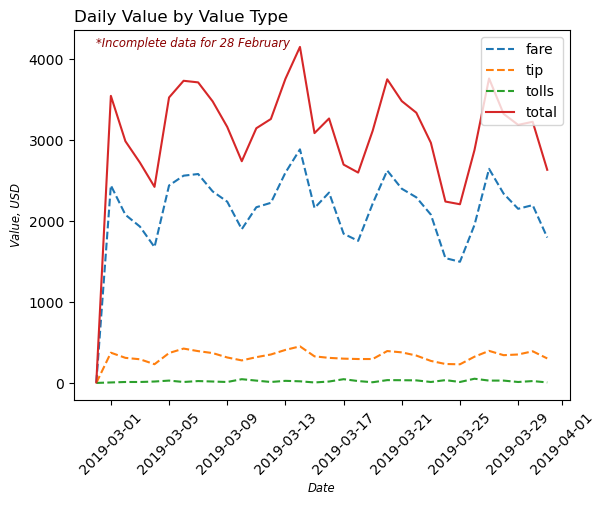

In [47]:
daily_value = taxis.groupby('date', as_index=False)[['fare', 'tip', 'tolls', 'total']].sum()

plt.plot(daily_value['date'], daily_value[['fare', 'tip', 'tolls']], linestyle='dashed')

plt.plot(daily_value['date'], daily_value['total'], linestyle='solid')

plt.xticks(rotation=45)

plt.title('Daily Value by Value Type', fontsize='large', loc='left')
plt.xlabel('Date', fontsize='small', fontstyle='italic')
plt.ylabel('Value, USD', fontsize='small', fontstyle='italic')
plt.text(daily_value['date'].min(),
         daily_value['total'].max(),
         '*Incomplete data for 28 February', 
         color='#8B0000', 
         fontstyle='italic',
         fontsize='small')

plt.legend(['fare', 'tip', 'tolls', 'total'], loc='upper right')

plt.show()

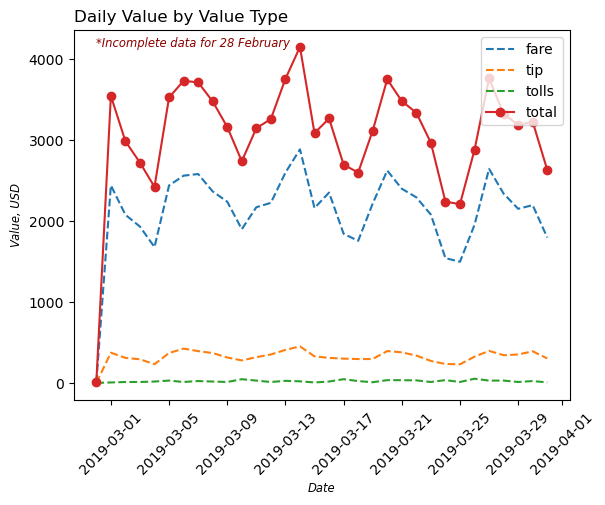

In [48]:
daily_value = taxis.groupby('date', as_index=False)[['fare', 'tip', 'tolls', 'total']].sum()

plt.plot(daily_value['date'], daily_value[['fare', 'tip', 'tolls']], linestyle='dashed')

plt.plot(daily_value['date'], daily_value['total'], linestyle='solid', marker='o')

plt.xticks(rotation=45)

plt.title('Daily Value by Value Type', fontsize='large', loc='left')
plt.xlabel('Date', fontsize='small', fontstyle='italic')
plt.ylabel('Value, USD', fontsize='small', fontstyle='italic')
plt.text(daily_value['date'].min(),
         daily_value['total'].max(), 
         '*Incomplete data for 28 February', 
         color='#8B0000', 
         fontstyle='italic',
         fontsize='small')

plt.legend(['fare', 'tip', 'tolls', 'total'], loc='upper right')

plt.show()

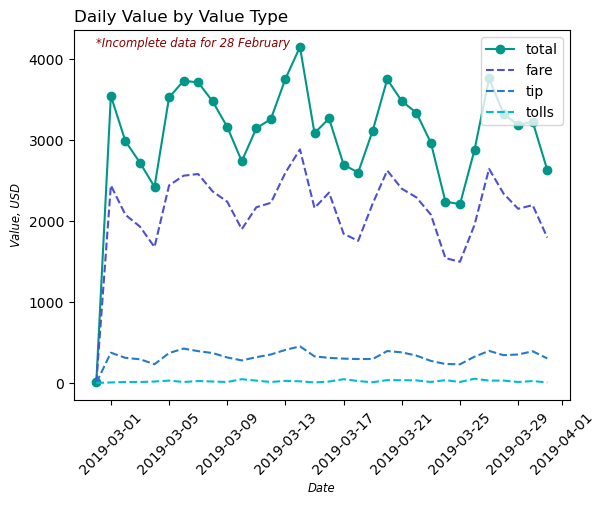

In [49]:
daily_value = taxis.groupby('date', as_index=False)[['fare', 'tip', 'tolls', 'total']].sum()

plt.plot(daily_value['date'], daily_value['total'], linestyle='solid', marker='o', color='#009688', label='total')

plt.plot(daily_value['date'], daily_value['fare'], linestyle='dashed', color='#4c50d2', label='fare')
plt.plot(daily_value['date'], daily_value['tip'], linestyle='dashed', color='#247bc9', label='tip')
plt.plot(daily_value['date'], daily_value['tolls'], linestyle='dashed', color='#00bcd4', label='tolls')

plt.xticks(rotation=45)

plt.title('Daily Value by Value Type', fontsize='large', loc='left')
plt.xlabel('Date', fontsize='small', fontstyle='italic')
plt.ylabel('Value, USD', fontsize='small', fontstyle='italic')
plt.text(daily_value['date'].min(),
         daily_value['total'].max(),
         '*Incomplete data for 28 February', 
         color='#8B0000', 
         fontstyle='italic',
         fontsize='small')

plt.legend(loc='upper right')

plt.show()

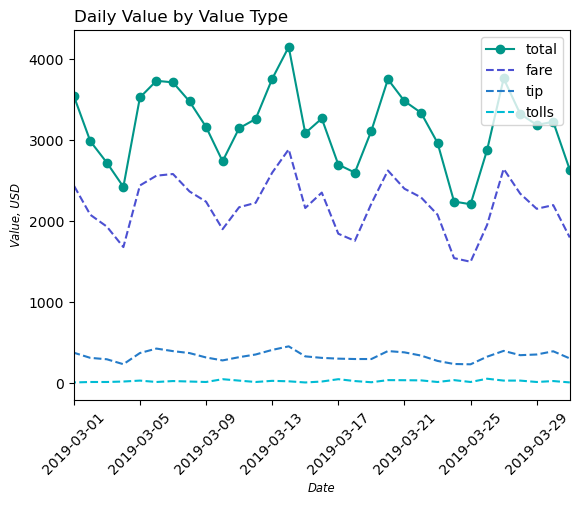

In [50]:
daily_value = taxis.groupby('date', as_index=False)[['fare', 'tip', 'tolls', 'total']].sum()

plt.plot(daily_value['date'], daily_value['total'], linestyle='solid', marker='o', color='#009688', label='total')

plt.plot(daily_value['date'], daily_value['fare'], linestyle='dashed', color='#4c50d2', label='fare')
plt.plot(daily_value['date'], daily_value['tip'], linestyle='dashed', color='#247bc9', label='tip')
plt.plot(daily_value['date'], daily_value['tolls'], linestyle='dashed', color='#00bcd4', label='tolls')

plt.xticks(rotation=45)

plt.title('Daily Value by Value Type', fontsize='large', loc='left')
plt.xlabel('Date', fontsize='small', fontstyle='italic')
plt.ylabel('Value, USD', fontsize='small', fontstyle='italic')

plt.legend(loc='upper right')

plt.xlim(daily_value['date'].iloc[1], daily_value['date'].iloc[-1])

plt.show()

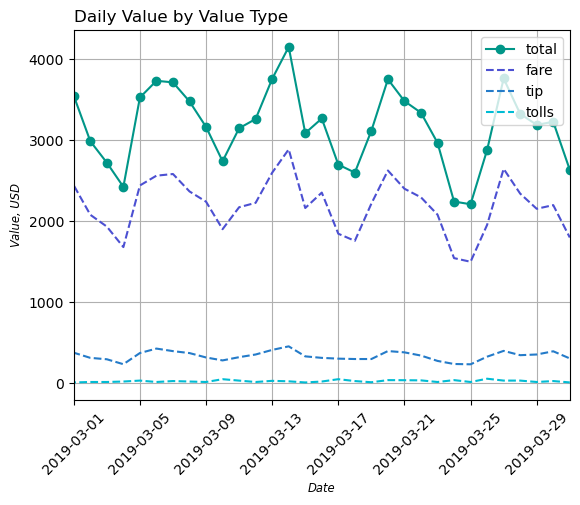

In [51]:
daily_value = taxis.groupby('date', as_index=False)[['fare', 'tip', 'tolls', 'total']].sum()

plt.plot(daily_value['date'], daily_value['total'], linestyle='solid', marker='o', color='#009688', label='total')

plt.plot(daily_value['date'], daily_value['fare'], linestyle='dashed', color='#4c50d2', label='fare')
plt.plot(daily_value['date'], daily_value['tip'], linestyle='dashed', color='#247bc9', label='tip')
plt.plot(daily_value['date'], daily_value['tolls'], linestyle='dashed', color='#00bcd4', label='tolls')

plt.xticks(rotation=45)

plt.title('Daily Value by Value Type', fontsize='large', loc='left')
plt.xlabel('Date', fontsize='small', fontstyle='italic')
plt.ylabel('Value, USD', fontsize='small', fontstyle='italic')

plt.legend(loc='upper right')

plt.xlim(daily_value['date'].iloc[1], daily_value['date'].iloc[-1])
plt.grid()

plt.show()

# Grafice cu bare

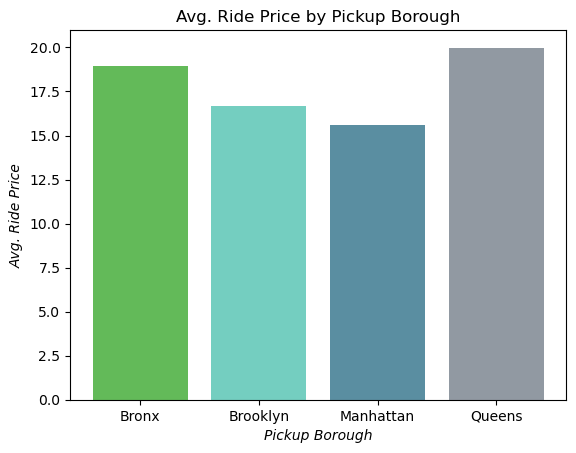

In [52]:
borough_avg_total = taxis.groupby('pickup_borough', as_index=False)['total'].mean()

plt.bar(borough_avg_total['pickup_borough'], 
        borough_avg_total['total'],
        color=['#63ba59', '#74cec0', '#5a8ea1', '#9199a2'])

plt.title('Avg. Ride Price by Pickup Borough')

plt.xlabel('Pickup Borough', fontstyle='italic')
plt.ylabel('Avg. Ride Price', fontstyle='italic')

plt.show()

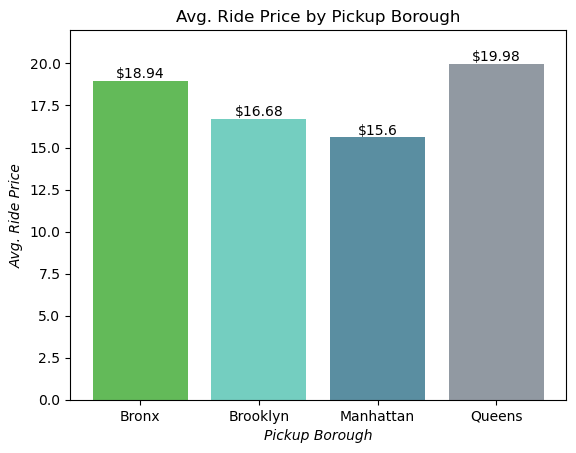

In [53]:
borough_avg_total = taxis.groupby('pickup_borough', as_index=False)['total'].mean()

plt.bar(borough_avg_total['pickup_borough'], 
        borough_avg_total['total'],
        color=['#63ba59', '#74cec0', '#5a8ea1', '#9199a2'])

plt.title('Avg. Ride Price by Pickup Borough')

plt.xlabel('Pickup Borough', fontstyle='italic')
plt.ylabel('Avg. Ride Price', fontstyle='italic')

plt.ylim(0, borough_avg_total['total'].max()*1.1)

borough_avg_total = borough_avg_total.set_index('pickup_borough')

for borough in borough_avg_total.index:
    plt.text(borough, 
             borough_avg_total.loc[borough, 'total'], 
             '$'+str(round(borough_avg_total.loc[borough, 'total'], 2)), 
             ha='center',
             va='bottom')

plt.show()

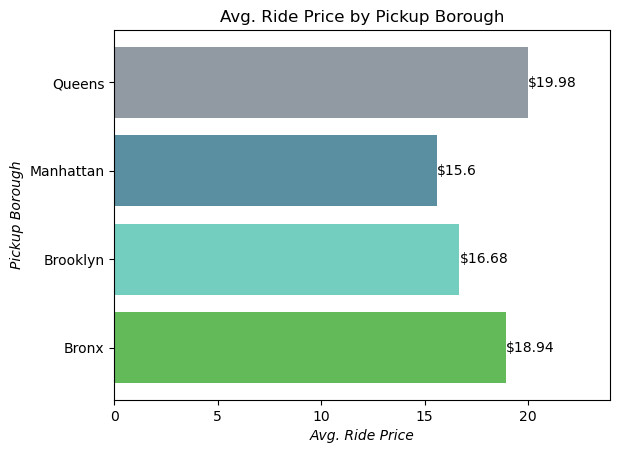

In [54]:
borough_avg_total = taxis.groupby('pickup_borough', as_index=False)['total'].mean()

plt.barh(borough_avg_total['pickup_borough'], 
         borough_avg_total['total'],
         color=['#63ba59', '#74cec0', '#5a8ea1', '#9199a2'])

plt.title('Avg. Ride Price by Pickup Borough')

plt.xlabel('Avg. Ride Price', fontstyle='italic')
plt.ylabel('Pickup Borough', fontstyle='italic')

plt.xlim(0, borough_avg_total['total'].max()*1.2)

borough_avg_total = borough_avg_total.set_index('pickup_borough')

for borough in borough_avg_total.index:
    plt.text(borough_avg_total.loc[borough, 'total'], 
             borough, 
             '$'+str(round(borough_avg_total.loc[borough, 'total'], 2)), 
             ha='left',
             va='center')

plt.show()

# Diagrame circulare

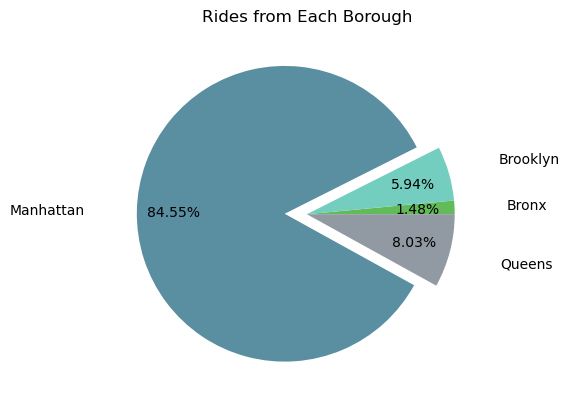

In [55]:
borough_rides = taxis.groupby('pickup_borough', as_index=False)['pickup'].count()

plt.pie(
    x=borough_rides['pickup'],
    labels=borough_rides['pickup_borough'],
    colors=['#63ba59', '#74cec0', '#5a8ea1', '#9199a2'],
    explode=[0, 0, 0.15, 0],
    autopct="%.2f%%",
    pctdistance=0.75,
    labeldistance=1.35,
)

plt.title('Rides from Each Borough')

plt.show()

# Chart layout

In [56]:
import seaborn as sns

taxis = sns.load_dataset('taxis')

quantile_95 = taxis['total'].quantile(.95)
taxis = taxis[(taxis['total'] <= quantile_95)]

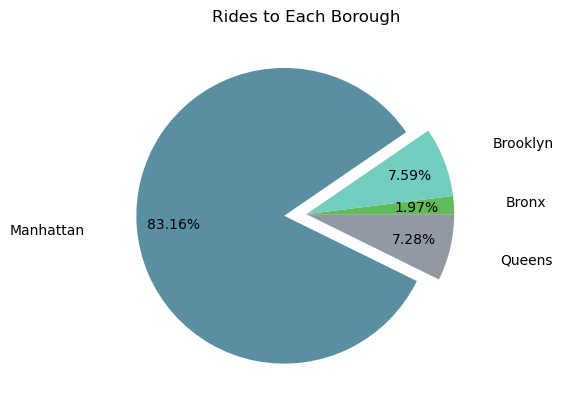

In [57]:
borough_dropoffs = taxis.groupby('dropoff_borough', as_index=False)['pickup'].count()

plt.pie(
    x=borough_dropoffs['pickup'],
    labels=borough_dropoffs['dropoff_borough'],
    colors=['#63ba59', '#74cec0', '#5a8ea1', '#9199a2'],
    explode=[0, 0, 0.15, 0],
    autopct="%.2f%%",
    pctdistance=0.75,
    labeldistance=1.35,
)

plt.title('Rides to Each Borough')

plt.show()

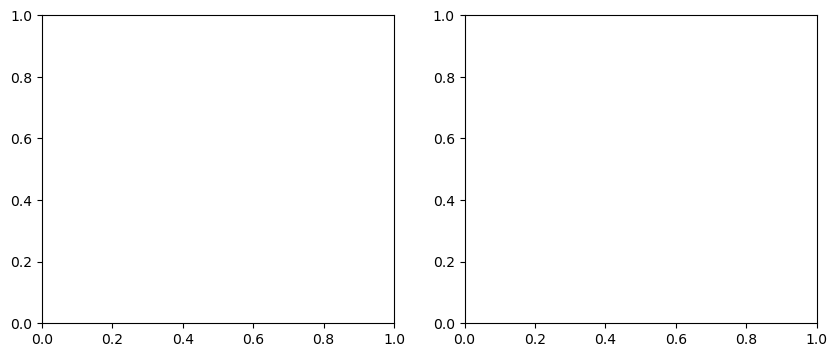

In [58]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

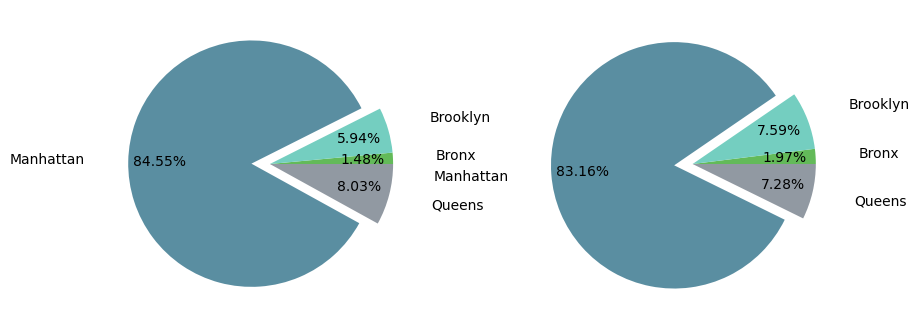

In [59]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

# pickup_borough
ax[0].pie(
    x=borough_rides['pickup'],
    labels=borough_rides['pickup_borough'],
    colors=['#63ba59', '#74cec0', '#5a8ea1', '#9199a2'],
    explode=[0, 0, 0.15, 0],
    autopct="%.2f%%",
    pctdistance=0.75,
    labeldistance=1.35,
)

# dropoff_borough
ax[1].pie(
    x=borough_dropoffs['pickup'],
    labels=borough_dropoffs['dropoff_borough'],
    colors=['#63ba59', '#74cec0', '#5a8ea1', '#9199a2'],
    explode=[0, 0, 0.15, 0],
    autopct="%.2f%%",
    pctdistance=0.75,
    labeldistance=1.35,
)

plt.show()

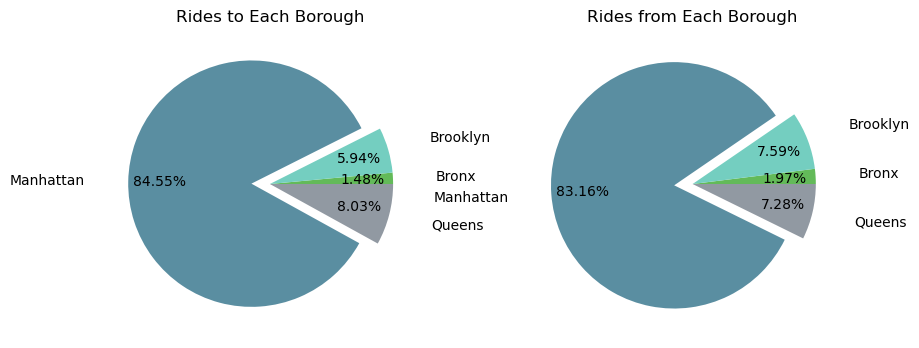

In [60]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

# pickup_borough
ax[0].pie(
    x=borough_rides['pickup'],
    labels=borough_rides['pickup_borough'],
    colors=['#63ba59', '#74cec0', '#5a8ea1', '#9199a2'],
    explode=[0, 0, 0.15, 0],
    autopct="%.2f%%",
    pctdistance=0.75,
    labeldistance=1.35,
)

ax[0].set_title('Rides to Each Borough')

# dropoff_borough
ax[1].pie(
    x=borough_dropoffs['pickup'],
    labels=borough_dropoffs['dropoff_borough'],
    colors=['#63ba59', '#74cec0', '#5a8ea1', '#9199a2'],
    explode=[0, 0, 0.15, 0],
    autopct="%.2f%%",
    pctdistance=0.75,
    labeldistance=1.35,
)

ax[1].set_title('Rides from Each Borough')

plt.show()

# Seaborn

In [63]:
import seaborn as sns

taxis = sns.load_dataset('taxis')

quantile_95 = taxis['total'].quantile(.95)
taxis = taxis[(taxis['total'] <= quantile_95)]